# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 2. Collect and load data

In [2]:
df_city = pd.read_csv('bigcity.csv')
df_city.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [3]:
df_city.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   u       49 non-null     int64
 1   x       49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


# 3. Explore numeric variables - five number summary

In [5]:
df_city.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

<AxesSubplot:xlabel='x'>

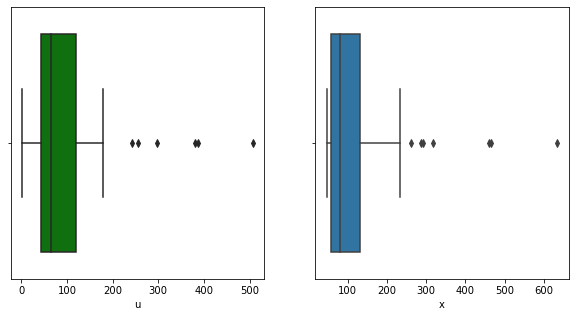

In [6]:
figure, ax = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(df_city.u,ax=ax[0], color = 'g')
sns.boxplot(df_city.x,ax=ax[1])

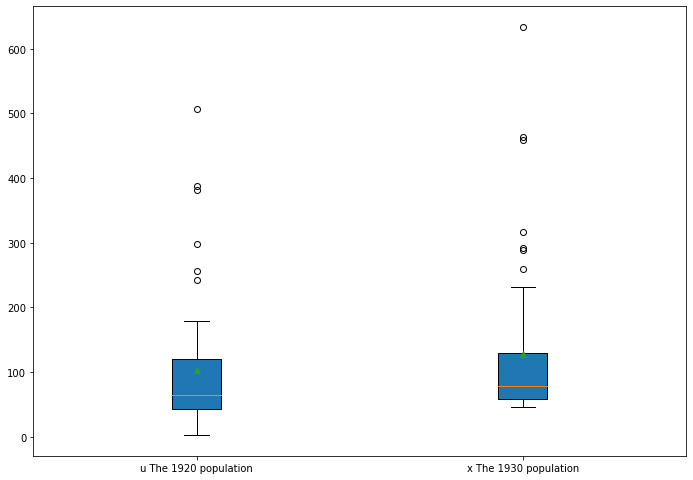

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
box_plot_data = [df_city.u, df_city.x]
ox = plt.boxplot(box_plot_data, vert=1, patch_artist=True, labels=['u The 1920 population', 'x The 1930 population'], showmeans = True)

<AxesSubplot:xlabel='x'>

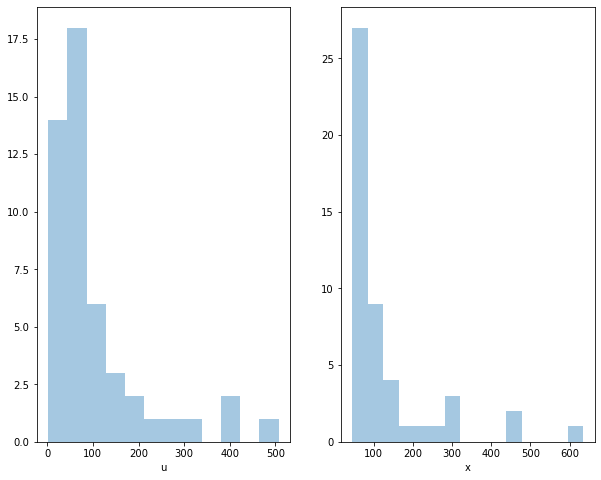

In [8]:
figure, ax = plt.subplots(1,2)
figure.set_size_inches(10,8)
sns.distplot(df_city.u, ax=ax[0], kde = False)
sns.distplot(df_city.x, ax=ax[1], kde = False)

<AxesSubplot:xlabel='x', ylabel='Density'>

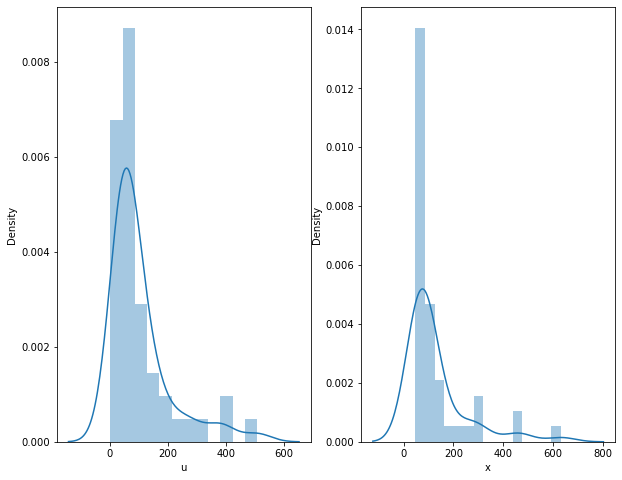

In [9]:
figure, ax = plt.subplots(1,2)
figure.set_size_inches(10,8)
sns.distplot(df_city.u, ax=ax[0], kde = True)
sns.distplot(df_city.x, ax=ax[1], kde = True)

In [10]:
print("u The 1920 population variance is:", df_city.u.var())
print("u The 1920 population standard deviation is:", df_city.u.std())

u The 1920 population variance is: 10900.416666666662
u The 1920 population standard deviation is: 104.40506054146351


In [11]:
print("x The 1930 population variance is:", df_city.x.var())
print("x The 1930 population standard deviation is:", df_city.x.std())

x The 1930 population variance is: 15158.832482993197
x The 1930 population standard deviation is: 123.12121053252034


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

In [12]:
pd.crosstab(df_city.u, df_city.x)

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='u', ylabel='x'>

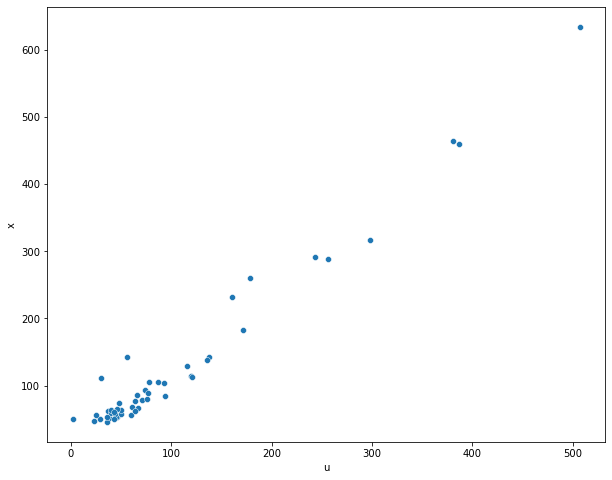

In [13]:
figure, ax = plt.subplots()
figure.set_size_inches(10,8)
sns.scatterplot(df_city.u, df_city.x, sizes = 'size', legend = 'full')

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [14]:
df_city.shape
print('Number of rows:', df_city.shape[0])
print('Number of columns', df_city.shape[1])

Number of rows: 49
Number of columns 2


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [15]:
df_city.isna().sum()

u    0
x    0
dtype: int64

In [16]:
df_city.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


<AxesSubplot:>

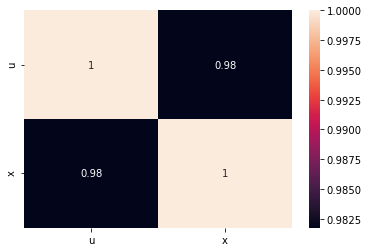

In [17]:
sns.heatmap(df_city.corr(), annot = True)

The high correlation between u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [18]:
X = df_city.u
y = df_city.x
Xc = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(Xc, y, random_state = 42, test_size = 0.2 )

print('Test shape x', X_test.shape)
print('Test shape y', y_test.shape)
print('Train shape x', X_train.shape)
print('Train shape y', y_train.shape)

Test shape x (10, 2)
Test shape y (10,)
Train shape x (39, 2)
Train shape y (39,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [19]:
linreg = LinearRegression()
linreg.fit(Xc,y)
print('Coefficient', linreg.coef_)
print('Intercept', linreg.intercept_)
print('R2 score', linreg.score(Xc,y))

Coefficient [0.        1.1577337]
Intercept 8.3839563331926
R2 score 0.963817258548811


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [20]:
reg_line = [(1.1577337*x) + linreg.intercept_ for x in X]
reg_line

[168.1512069331926,
 116.05319043319261,
 79.00571203319261,
 215.6182886331926,
 63.955173933192604,
 51.2201032331926,
 41.958233633192606,
 35.0118314331926,
 43.1159673331926,
 10.6994237331926,
 52.377836933192604,
 61.6397065331926,
 90.58304903319261,
 37.3272988331926,
 353.3885989331926,
 94.0562501331926,
 66.2706413331926,
 96.37171753319261,
 449.48049603319265,
 456.4268982331926,
 98.68718493319261,
 77.8479783331926,
 595.3549422331927,
 66.2706413331926,
 97.5294512331926,
 82.4789131331926,
 54.6933043331926,
 165.83573953319262,
 289.71324543319264,
 304.7637835331926,
 117.2109241331926,
 50.0623695331926,
 60.48197283319261,
 85.9521142331926,
 147.3120003331926,
 207.51415273319262,
 84.79438053319261,
 61.6397065331926,
 148.46973403319262,
 59.324239133192606,
 82.4789131331926,
 73.21704353319261,
 54.6933043331926,
 142.68106553319262,
 109.1067882331926,
 58.166505433192604,
 58.166505433192604,
 194.77908203319262,
 50.0623695331926]

Text(0, 0.5, 'Dependent Variable')

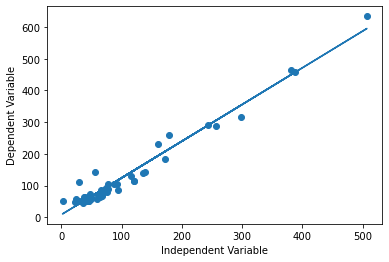

In [21]:
plt.scatter(df_city.u, df_city.x)
plt.plot(df_city.u, reg_line)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')


# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)

print("R2 of the train:", r2_score(y_train,y_pred_train))
print("RMSE of the train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 of the train: 0.9596126269828564
RMSE of the train: 24.52389790641461


In [23]:
y_pred_test = lin_reg.predict(X_test)

print("R2 of the test:", r2_score(y_test,y_pred_test))
print("RMSE of the test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 of the test: 0.980375436960151
RMSE of the test: 16.9662569723268


In [24]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.linear_model import LinearRegression

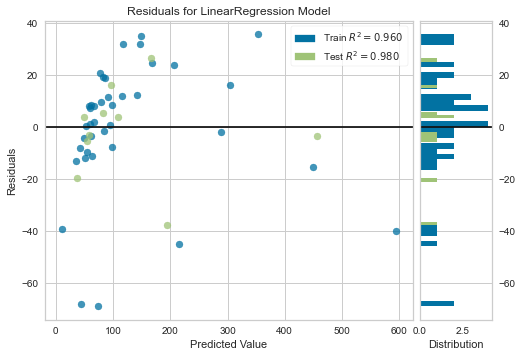

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [26]:
lin_reg.score(X_train, y_train)

0.9596126269828564

In [27]:
lin_reg.score(X_test, y_test)

0.980375436960151